In [1]:
import sys
from pathlib import Path
# Add project root to Python path (go up one level from notebooks/)
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# import the config from main
    
from main import load_config
from data.Stanford.data_loader_stanford import DataLoaderStanford

c:\Users\Besitzer\OneDrive\Dokumente\CBS_Copenhagen\Semester\WS2025\AdvNLP\Final Exam\AVDNLP_final_project\venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
c:\Users\Besitzer\OneDrive\Dokumente\CBS_Copenhagen\Semester\WS2025\AdvNLP\Final Exam\AVDNLP_final_project\venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
config = load_config("configs/config.yaml")
loader = DataLoaderStanford(config)
df = loader.load_data()

Loaded config from c:\Users\Besitzer\OneDrive\Dokumente\CBS_Copenhagen\Semester\WS2025\AdvNLP\Final Exam\AVDNLP_final_project\configs\config.yaml


In [4]:
df.head()

,label,text
0,1,A person on a horse jumps over a broken down a...
1,2,A person on a horse jumps over a broken down a...
2,0,A person on a horse jumps over a broken down a...
3,1,Children smiling and waving at camera [SEP] Th...
4,0,Children smiling and waving at camera [SEP] Th...


In [5]:
# Dataset shape and basic statistics
print(f"Dataset shape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")

Dataset shape: (549367, 2)

Missing values:
label    0
text     0
dtype: int64


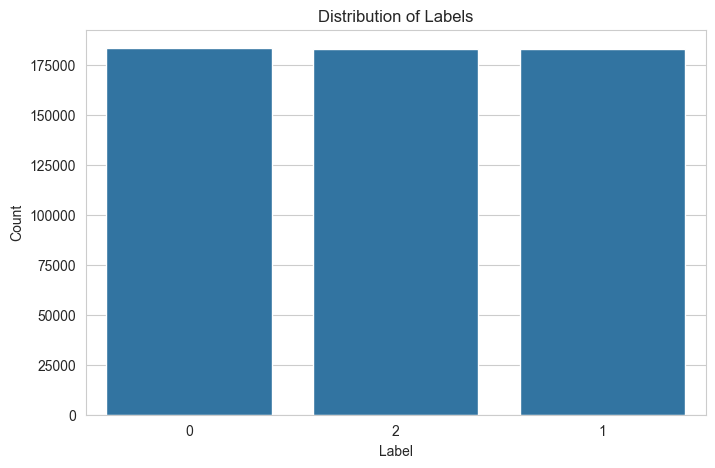

In [6]:
# distribution of target variable
if 'label' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
    plt.title('Distribution of Labels')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

In [7]:
# show labels unique values
if 'label' in df.columns:
    print(f"Unique labels: {df['label'].unique()}")

Unique labels: [1 2 0]


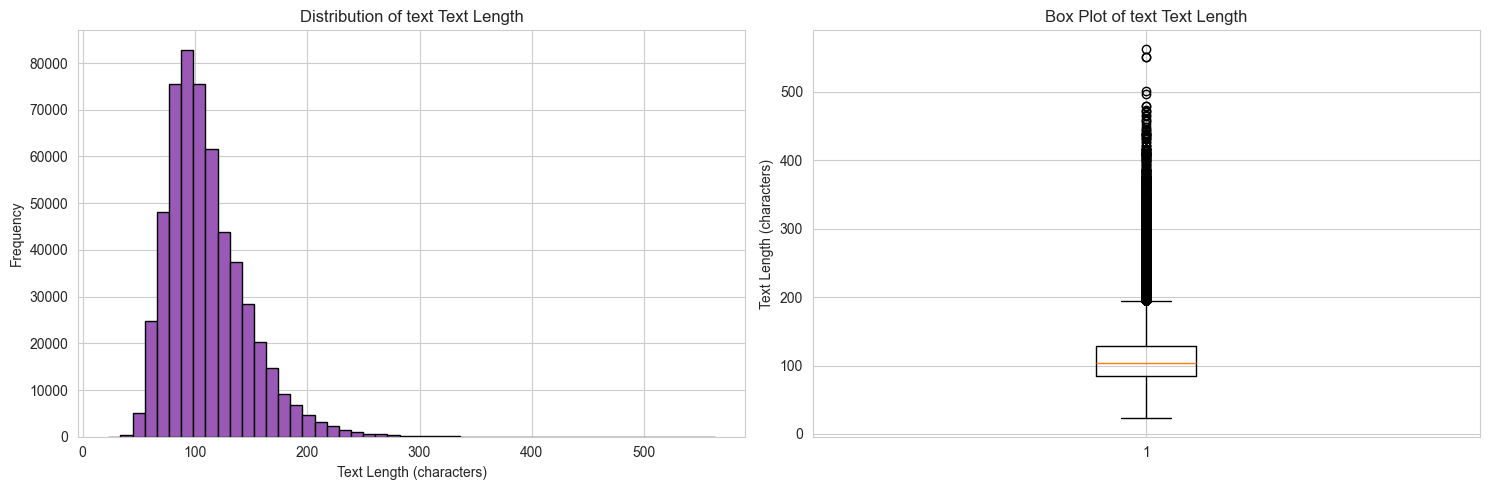

Mean text length: 110.75
Median text length: 104.00


In [8]:
if 'text' in df.columns:
    df['text_length'] = df['text'].astype(str).apply(len)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(df['text_length'], bins=50, color='#9b59b6', edgecolor='black')
    axes[0].set_title('Distribution of text Text Length')
    axes[0].set_xlabel('Text Length (characters)')
    axes[0].set_ylabel('Frequency')
    
    # Box plot
    axes[1].boxplot(df['text_length'], vert=True)
    axes[1].set_title('Box Plot of text Text Length')
    axes[1].set_ylabel('Text Length (characters)')
    
    plt.tight_layout() 
    plt.show()
    
    print(f"Mean text length: {df['text_length'].mean():.2f}")
    print(f"Median text length: {df['text_length'].median():.2f}")

In [9]:
# remove the temporary 'news_length' column
if 'text_length' in df.columns:
    df.drop(columns=['text_length'], inplace=True)

In [10]:
# export cleaned dataframe to csv
loader.save_csv(df)

Saved: C:\Users\Besitzer\OneDrive\Dokumente\CBS_Copenhagen\Semester\WS2025\AdvNLP\Final Exam\AVDNLP_final_project\data\Stanford\stanford_processed.csv


WindowsPath('C:/Users/Besitzer/OneDrive/Dokumente/CBS_Copenhagen/Semester/WS2025/AdvNLP/Final Exam/AVDNLP_final_project/data/Stanford/stanford_processed.csv')